# zadanie 1
## Symulacja niejednorodnego procesu Poissona

Wybieramy $\lambda$, takie że $\lambda(t) \le \lambda$, dla każdego $t\le T$.

Procedura: Niech $k$ będzie liczbą zdarzeń, które występują do czasu $t$. Zatem $S(k)$ to czas ostatniego zdarzenia.


1. $t=0, k=0$.
2. Generujemy $u1 \sim U(0,1)$.
3. $t = t - ln(u1)/\lambda$, jeżeli $t>T$, stopujemy, jeśli nie to krok 4.
4. Generujemy $u2 \sim U(0,1)$, niezależne od $u1$.
5. Jeżeli $u2 \le \lambda(t)/\lambda$, wtedy $k=k+1, S(k)=t$.
6. Powtarzamy kroki 2-6.

Na końcu procedury otrzymujemy $S(k)$ (czasy zdarzeń) i proces zliczania.

### Działanie: Modyfikujemt lamba_x(), lambdau(t), tak by były zgodne z założeniami, podajemy wartości dla T, t oraz wywołujemy funkcję nhpp(T,t)

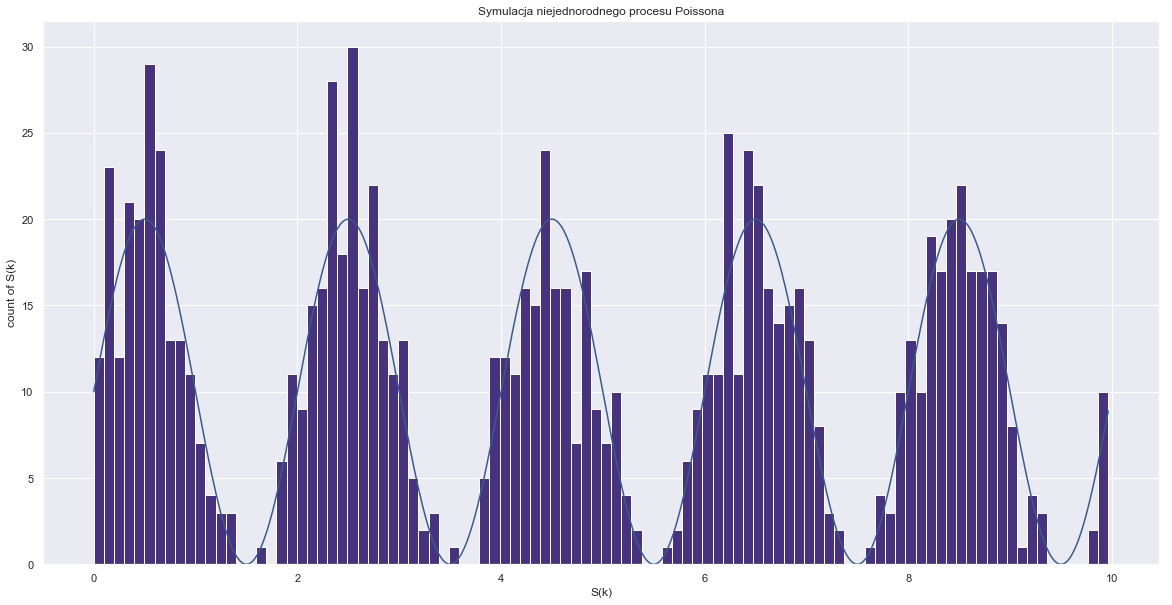

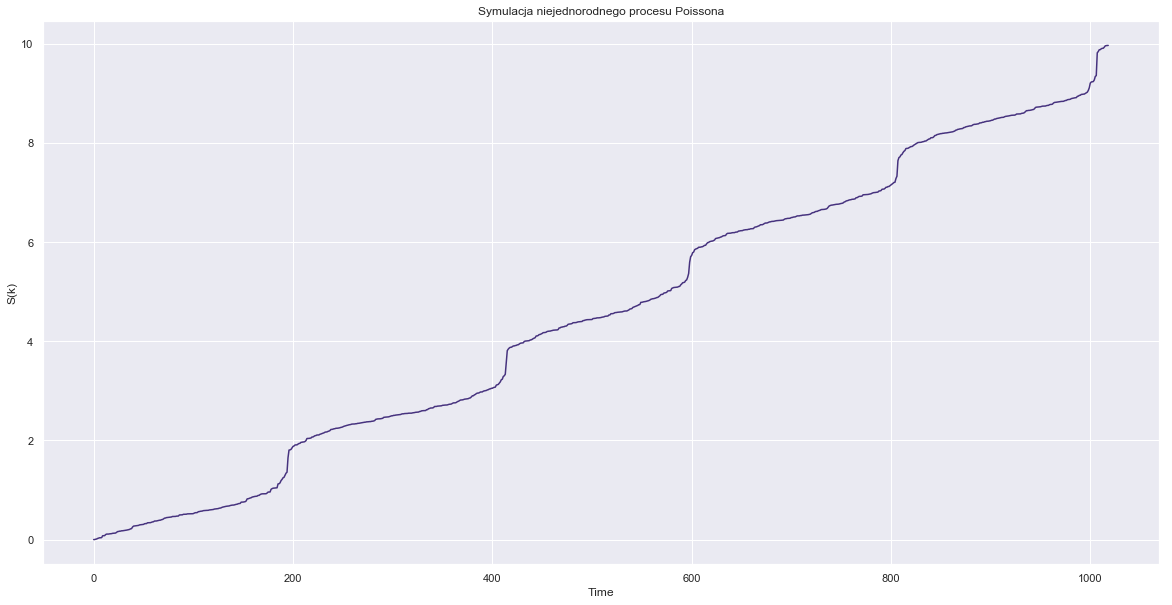

In [8]:
import numpy as np# v.1.17 package  
import matplotlib.pyplot as plt # v.3.1.2 package
import seaborn as sns #v.0.9.0 package
sns.set(palette='viridis') 

def lambda_(x): # lambda(t)
    return 100*(np.sin(x*np.pi)+1)

def lambdau(t): #lambda
    return 200

def nhpp(T,t):
    Eventtimes = [] #tablica S(k)
    done=0
    while done!=1:
        u = np.random.uniform()
        t = t- np.log(u)/lambdau(t)
        if t>T:
            done=1
        else:
            if (np.random.uniform() <=lambda_(t)/lambdau(t)):
                Eventtimes.append(t)
                
    u = np.linspace(0, max(Eventtimes), num=int(max(Eventtimes)/0.02))
    a=[]
    for i in range(len(u)):
        a.append(lambda_(u[i])/10)
    
    plt.figure(figsize=(20,10))
    plt.hist(Eventtimes,int(T/0.1))
    plt.plot(u,a)
    plt.xlabel("S(k)")
    plt.ylabel("count of S(k)")
    plt.title("Symulacja niejednorodnego procesu Poissona")
    plt.show()
    
    a=np.zeros(len(Eventtimes))
    for i in range(len(Eventtimes)):
        a[i]=i
    plt.figure(figsize=(20,10))    
    plt.plot(a,Eventtimes)
    plt.xlabel("Time")
    plt.ylabel("S(k)")
    plt.title("Symulacja niejednorodnego procesu Poissona")
    plt.show()

T =10
t=0
nhpp(T,t)

# zadanie 2
## Symulacja dwuwymiarowego jednorodnego procesu Poissona.

Opis działania w komentarzach 

### Działanie: Podajemy wartość dla lamba0 i wywołujemy funkcję poisson_process(lambda0)

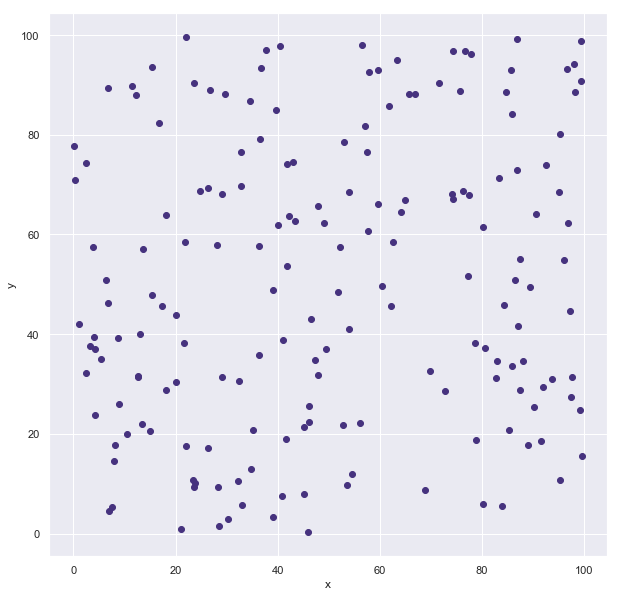

In [9]:
import numpy as np;              # v.1.17 package 
import matplotlib.pyplot as plt  # 3.1.2 version package
def poisson_process(lambda0):
    # Symulacja parametrów, rozmiar okna
    xMin = 0;
    xMax = 100;
    yMin = 0;
    yMax = 100;
    xDelta = xMax - xMin;
    yDelta = yMax - yMin;  
    areaTotal = xDelta * yDelta;
    
    # Symulacja punktów procesu Poissona
    numbPoints = np.random.poisson(lambda0 * areaTotal);  # Liczba punktów
    xx = xDelta * np.random.uniform(0, 1, numbPoints) + xMin;  # współrzędna x
    yy = yDelta * np.random.uniform(0, 1, numbPoints) + yMin;  # współrzędna y
    
    # Wykres
    plt.figure(figsize=(10,10))
    plt.scatter(xx, yy);
    plt.xlabel('x');
    plt.ylabel('y');
    plt.show()
    
# Parametry procesu Poissona
lambda0 = 0.02;  # intensywność (średnia gęstość na siatce) procesu Poissona   

poisson_process(lambda0)

# Zadanie 4
## Proces Ornstein–Uhlenbeck 
Dane jest stochastyczne równanie różniczkowe: 

$dx_t = \theta(\mu - x_t)dt+\sigma dW_t$ 

Aproksymacja powyższego zdyskretyzowanego równania ma postać:

$X_{n+1} = X_n + \theta(\mu - X_n)\Delta t+\sigma \Delta W_n$ ,gdzie

$\Delta W_n = W_{t_n+1}-W_{t_n} \sim N(0,\Delta t) = \sqrt{\Delta t} N(0,1) $

### Działanie: Podajemy wartości dla sigma, mi, th,dt,T i wywołujemy funkcję poisson_process(lambda0)

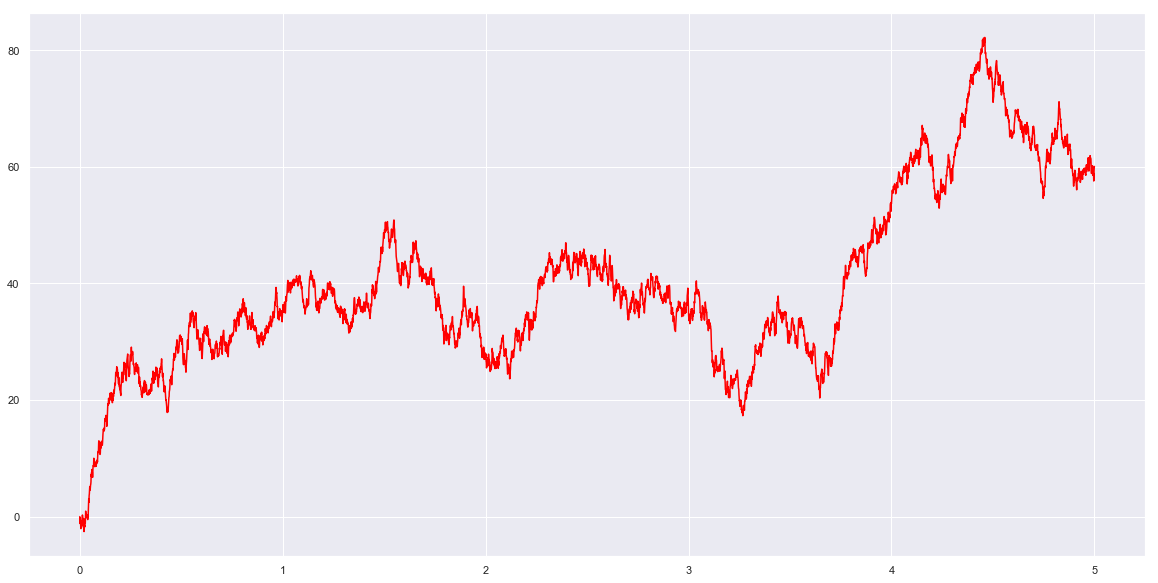

In [15]:
import numpy as np # v.1.17 package 
import matplotlib.pyplot as plt # 3.1.2 version package
%matplotlib inline

def Ornstein_Uhlenbeck(sigma,mi,th,dt,T):
    
    n = int(T / dt) #Liczba n dla czasu
    x = np.zeros(n) #n-elementowy wektor do przechowywania X_i
    t = np.linspace(0., T, n) #n-elementowy wektor czasu
    sqrtdt = np.sqrt(dt)

    #Algorytm:
    for i in range(n - 1):
        x[i+1] = x[i] + th*(mi-x[i])*dt + sigma*sqrtdt*np.random.randn() # zmienna z rozkładu normalnego N(0,1)
        
    plt.figure(figsize=(20,10))
    plt.plot(t, x, 'r')
    plt.show()

#Wprowadzenie danych: 
sigma = 20 #Odchylenie standardowe
mi = 100  #Wartość oczekiwana
th = 0.1  #Wartość teta
dt = .001  #Odstęp czasu
T = 5.  #Czas 
    
Ornstein_Uhlenbeck(sigma,mi,th,dt,T)

## Proces Milsteina 
(dodatkowo)
Równanie : dX(t) = r*X(t)dt+sigma*X(t)dW(t), X0 = x_0
### Działanie: Podajemy wartości dla sigma, mi, th,dt,T i wywołujemy funkcję poisson_process(lambda0)

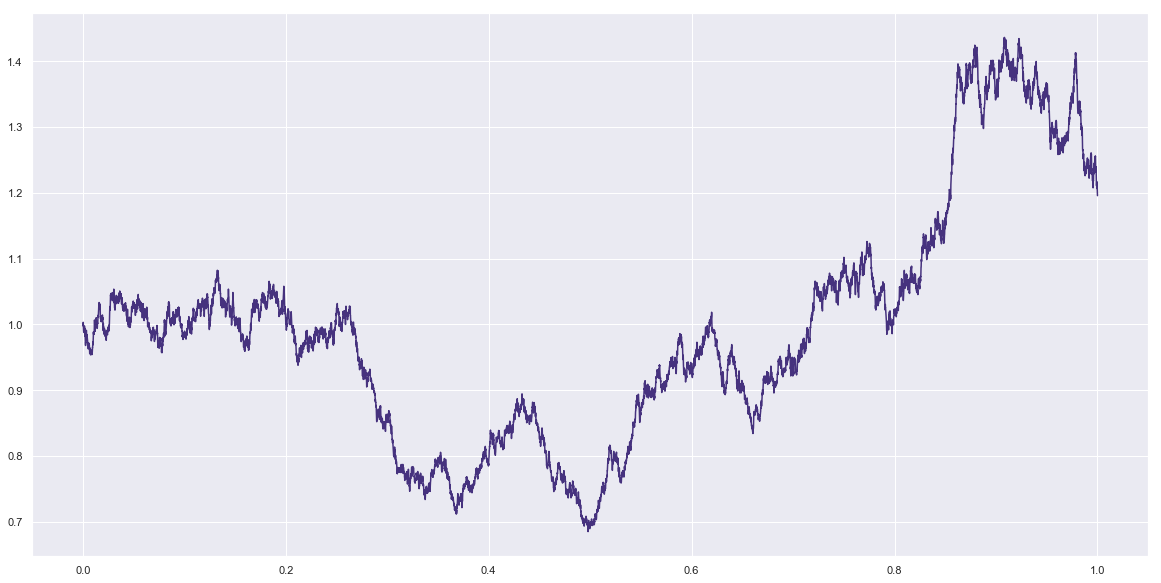

In [18]:
import numpy as np  # v.1.17 package 
import pandas as pd # v.0.25.1 package
import matplotlib.pyplot as plt # v.3.1.2  package

def f(t,x):
    return 0.0*t + r * x

def g(t, x):
    return sigma * x+0.0

def Dg_g(t,x):
    return (sigma + 0.0 * x) * g(t, x)

def L1_Milstein(x_0, T, f, g, Dg_g):
    np.random.seed(seed=None)
    N=10000
    h = float(T/N)
    hh =np.zeros(N+1)
    hh[0] = 0.0
    X_h = np.zeros(N+1)
    X_h[0] = x_0
    X_temp = x_0
    X = x_0

    for j in range(1,N+1):
        tau_j = np.random.rand()
        theta_j = h * j + tau_j * h
        n1 = np.random.normal(0, 1)
        n2 = np.random.normal(0, 1)
        I_1 = np.sqrt(tau_j * h) * n1
        I_11 = (I_1 ** 2 - tau_j * h) / 2
        J_1 = np.sqrt((1 - tau_j) * h) * n2
        J_11 = (J_1 ** 2 - (1 - tau_j) * h) / 2
        K_1 = I_1 + J_1
        K_11 = I_11 + J_11 + I_1 * J_1
        X_tau = X_temp + tau_j * h * f(h*j, X_temp)+ g(h*j, X_temp) * I_1
        X = X_temp + h * f(theta_j, X_tau)+ g(h*j, X_temp) * K_1+ Dg_g(h*j, X_temp) * K_11
        X_temp = X 
        hh[j]=j*h
        X_h[j] = X
        
    plt.figure(figsize=(20,10))
    plt.plot(hh,X_h)
    plt.show()

r = 0.08
sigma = 0.4
T = 1
x_0 = 1
N = 10000
h = float(T/N)

L1_Milstein(x_0, T, f, g, Dg_g)